In [293]:
import os
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [294]:
df = pd.read_csv(open('Stores.csv', 'rb'))  #https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [295]:
df['Daily_Customer_Count']

0       530
1       210
2       720
3       620
4       450
       ... 
891    1080
892     850
893    1060
894     770
895    1110
Name: Daily_Customer_Count, Length: 896, dtype: int64

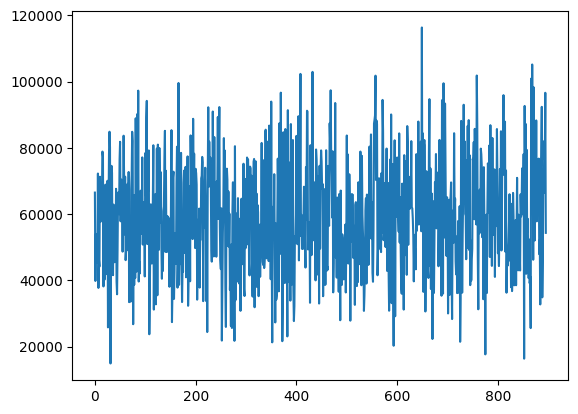

In [296]:
import matplotlib.pyplot as plt
plt.plot(df['Store_Sales'])

In [297]:
x = np.hstack((             
    df['Items_Available'].values.reshape(-1, 1),
    df['Daily_Customer_Count'].values.reshape(-1, 1)
))
y = df['Store_Sales'].values
x_base, x_test, y_base, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [298]:
scaler = StandardScaler()
x_base_scaled = scaler.fit_transform(x_base)
x_test_scaled = scaler.fit_transform(x_test)

271142275.2172833 0.0033289170526877854


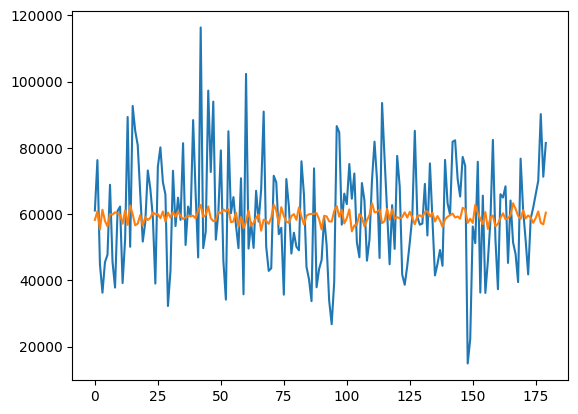

In [299]:
model = LinearRegression()
model.fit(x_base_scaled, y_base)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

plt.plot(y_test)
plt.plot(y_pred)

271141909.23523873 0.0033302623380012664


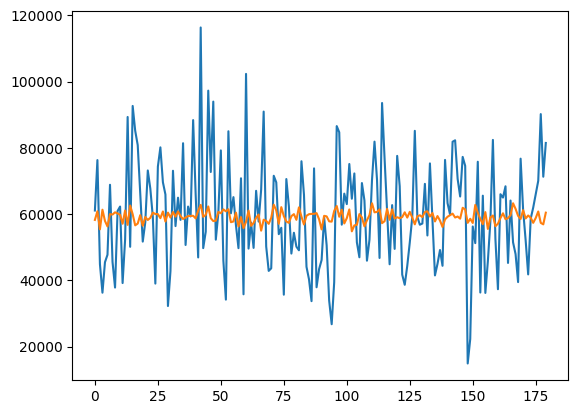

In [300]:
model = Lasso(alpha=0.1)
model.fit(x_base_scaled, y_base)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

plt.plot(y_test)
plt.plot(y_pred)

271140892.5777433 0.0033339993912741006


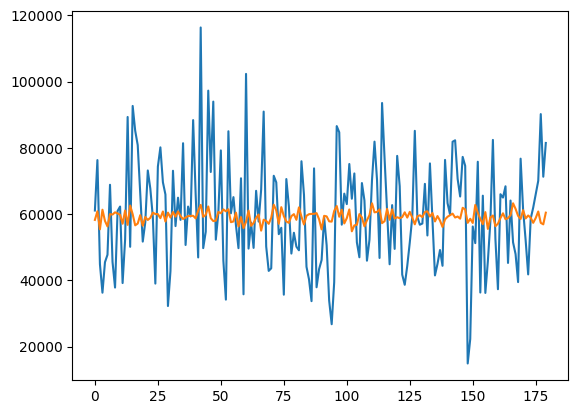

In [301]:
model = Ridge()
model.fit(x_base_scaled, y_base)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

plt.plot(y_test)
plt.plot(y_pred)

271108243.772119 0.0034540106305116502


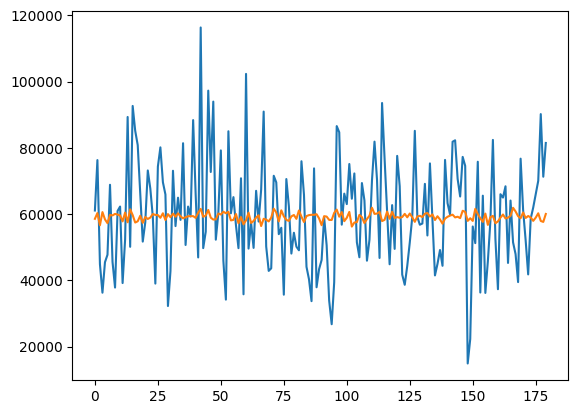

In [302]:
model = ElasticNet()
model.fit(x_base_scaled, y_base)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

plt.plot(y_test)
plt.plot(y_pred)

277420592.121018 -0.019749066277345184


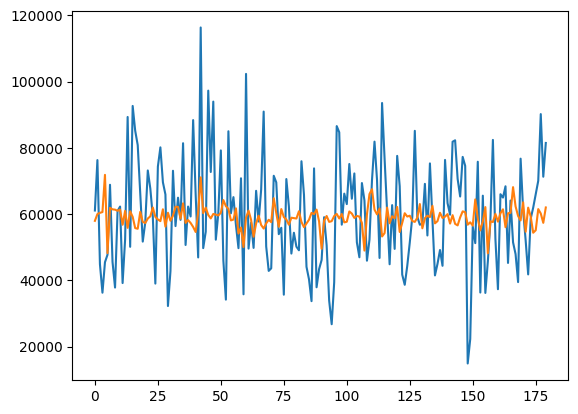

In [303]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(x_base_scaled, y_base)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

plt.plot(y_test)
plt.plot(y_pred)

334738324.46666664 -0.23043892024143986


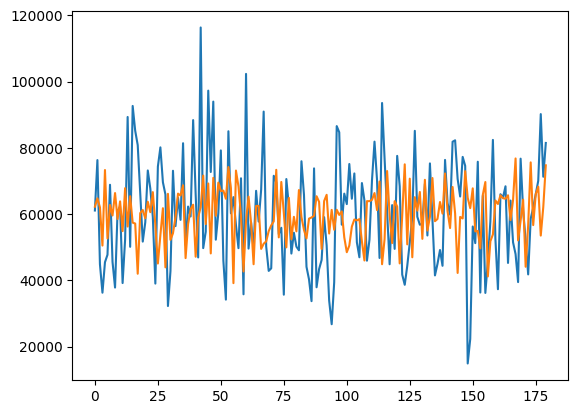

In [306]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_base_scaled, y_base)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

plt.plot(y_test)
plt.plot(y_pred)

431804278.6086606 -0.5872362125651438


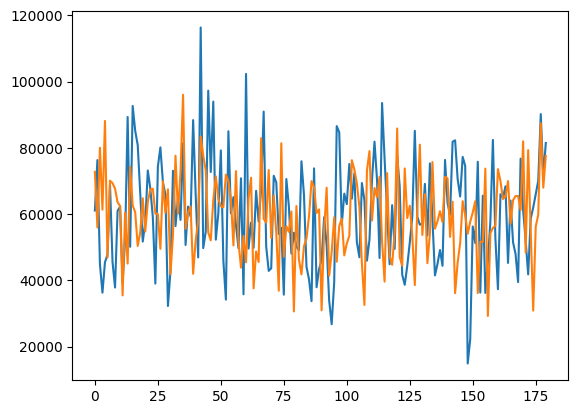

In [307]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(x_base_scaled, y_base)

y_pred = model.predict(x_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

plt.plot(y_test)
plt.plot(y_pred)